# K-Means Project

**In this small project you will use the k-means algorithm to segment houses based on their coordinates and median income.**

We will create 6 housing clusters based only on their 'latitude','longitude' and their 'medincome' column.

In [17]:
#!pip install pandas sklearn seaborn

## Step 1:

Install and import the necessary libraries: pandas, sklearn and seaborn.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step 2:

Load the housing dataset and take a look at the first rows. Then create a new dataframe with only the 'latitude','longitude' and 'medincome' column to create our clusters.

In [5]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df = df_raw.loc[:, ["MedInc", "Latitude", "Longitude"]]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


**Scale features**

In [7]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

scaled_df = pd.DataFrame(scaled_df,columns=df.columns) # use this df when k=6

scaled_df2 = scaled_df.copy() #find optimal k

In [8]:
scaled_df.head()

,MedInc,Latitude,Longitude
0,2.344766,1.052548,-1.327835
1,2.332238,1.043185,-1.322844
2,1.782699,1.038503,-1.332827
3,0.932968,1.038503,-1.337818
4,-0.012881,1.038503,-1.337818


## Step 3:

Instantiate the kmeans algorithm. Then, create a new 'cluster' feature in your dataset and predict the cluster by fitting the 3 columns you have

In [9]:
kmeans = KMeans(n_clusters=6)
scaled_df["Cluster"] = kmeans.fit_predict(scaled_df)

## Step 4:

Convert your new 'cluster' column to 'category' type.

In [10]:
scaled_df["Cluster"] = scaled_df["Cluster"].astype("category")

scaled_df.head()

,MedInc,Latitude,Longitude,Cluster
0,2.344766,1.052548,-1.327835,0
1,2.332238,1.043185,-1.322844,0
2,1.782699,1.038503,-1.332827,0
3,0.932968,1.038503,-1.337818,0
4,-0.012881,1.038503,-1.337818,2


## Step 5:

Use seaborn's relplot to visualize your new clusters.

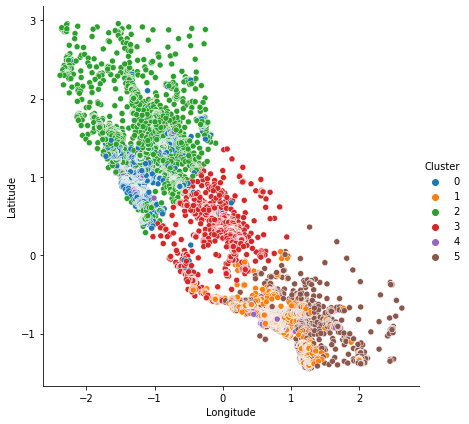

In [11]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=scaled_df, height=6,
);

## Find optimal number of clusters

**Elbow Method**

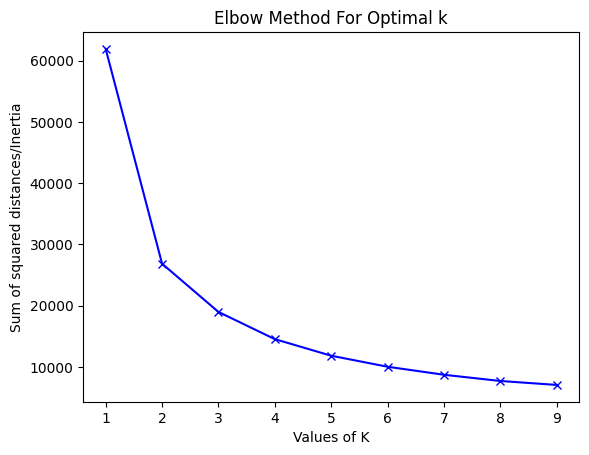

In [12]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df2)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

**The Silhouette Method**

- The value of the silhouette coefﬁcient is between [-1, 1].
- A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.

Source: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

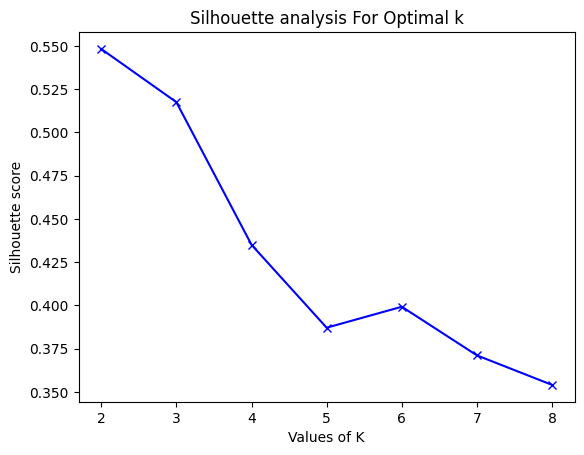

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df2)
    cluster_labels = kmeans.labels_
 
    silhouette_avg.append(silhouette_score(scaled_df2, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**According to the elbow method and the silhouette method, we can conclude that in this case the optimal number of clusters would be 2.**

In [14]:
kmeans = KMeans(n_clusters=2)
scaled_df2["Cluster"] = kmeans.fit_predict(scaled_df2)

In [15]:
scaled_df2["Cluster"] = scaled_df2["Cluster"].astype("category")

scaled_df2.head()

,MedInc,Latitude,Longitude,Cluster
0,2.344766,1.052548,-1.327835,0
1,2.332238,1.043185,-1.322844,0
2,1.782699,1.038503,-1.332827,0
3,0.932968,1.038503,-1.337818,0
4,-0.012881,1.038503,-1.337818,0


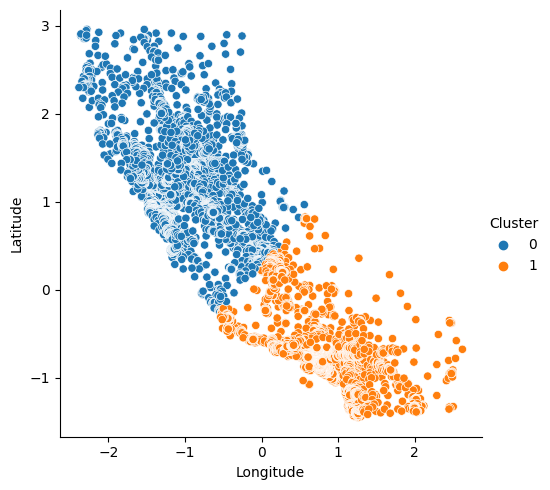

In [16]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=scaled_df2, 
);